# Data Analysis
Download dataset at https://www.kaggle.com/datasets/datafiniti/consumer-reviews-of-amazon-products

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df0 = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv', usecols=['reviews.rating', 'reviews.text'])
df1 = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv', usecols=['reviews.rating', 'reviews.text'])
df2 = pd.read_csv('1429_1.csv', usecols=['reviews.rating', 'reviews.text'])
df = pd.concat((df0, df1, df2), ignore_index=True)
df.columns =  ['rating', 'text']
df.dropna(
  axis='index',
  how='any',
  inplace=True
)

In [3]:
df

rating                                               text
0         3.0  I order 3 of them and one of the item is bad q...
1         4.0  Bulk is always the less expensive way to go fo...
2         5.0  Well they are not Duracell but for the price i...
3         5.0  Seem to work as well as name brand batteries a...
4         5.0  These batteries are very long lasting the pric...
...       ...                                                ...
67987     3.0  This is not appreciably faster than any other ...
67988     1.0  Amazon should include this charger with the Ki...
67989     1.0  Love my Kindle Fire but I am really disappoint...
67990     1.0  I was surprised to find it did not come with a...
67991     1.0  to spite the fact that i have nothing but good...

[67958 rows x 2 columns]

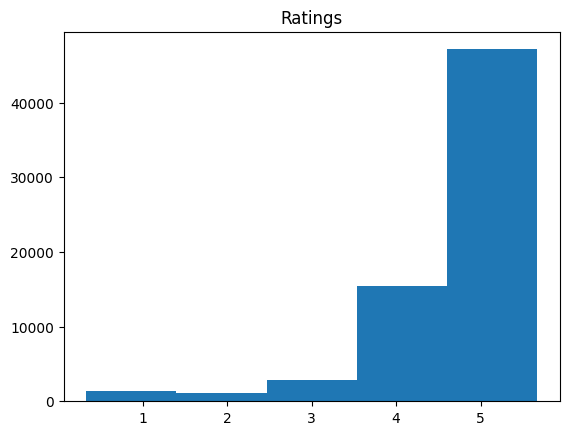

5.0    47149
4.0    15397
3.0     2902
1.0     1438
2.0     1072
Name: rating, dtype: int64

In [4]:
plt.hist(df['rating'], range=(1,5), bins=5)
plt.xticks([1.5,2.25,3,3.75,4.5],labels=[1,2,3,4,5])
plt.title('Ratings')
plt.show()
df['rating'].value_counts()

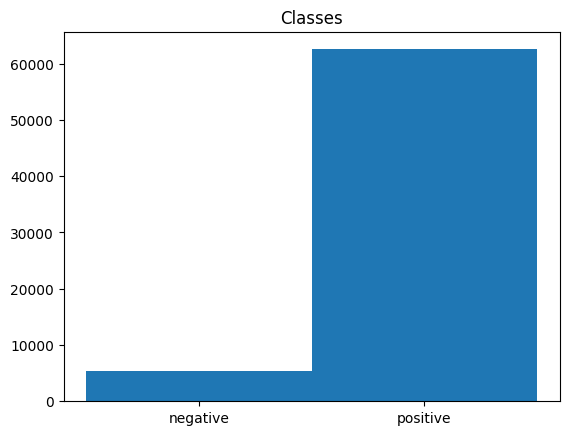

In [5]:
plt.hist(df['rating'].map(lambda x: 0 if x <=3 else 1), range=(0,2), bins=[0,0.5,1])
plt.xticks([0.25,0.75], labels=['negative','positive'])
plt.title('Classes')
plt.show()

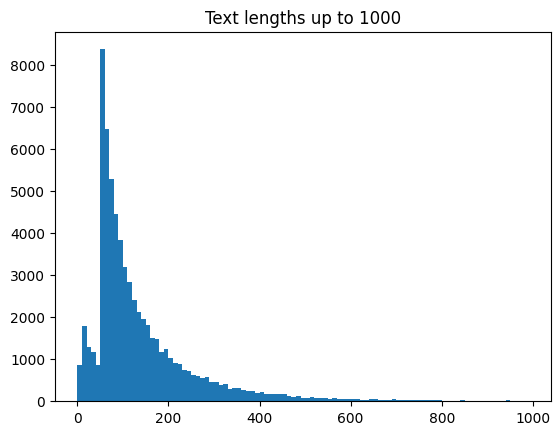

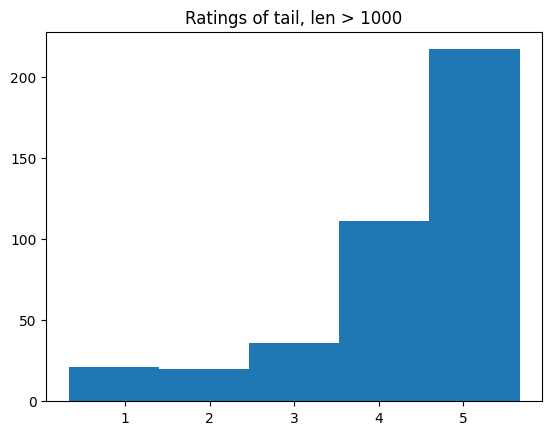

In [6]:
lens = df['text'].map(len).values
plt.hist(lens, bins=range(0, 1000, 10))
plt.title('Text lengths up to 1000')
plt.show()
long_texts = df[df['text'].apply(lambda x: len(x) >= 1000)]
long_texts.assign(len = long_texts['text'].map(len))
plt.hist(long_texts['rating'], range=(1,5), bins=5)
plt.xticks([1.5,2.25,3,3.75,4.5],labels=[1,2,3,4,5])
plt.title('Ratings of tail, len > 1000')
plt.show()

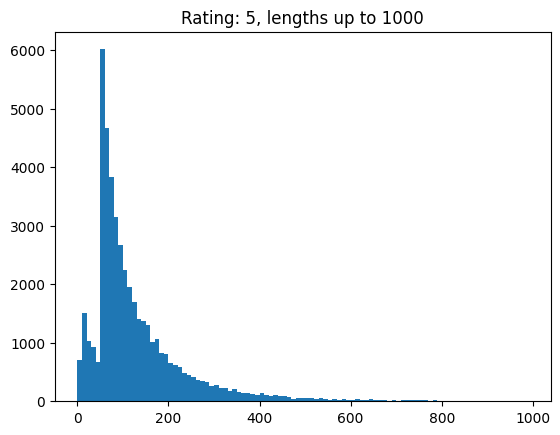

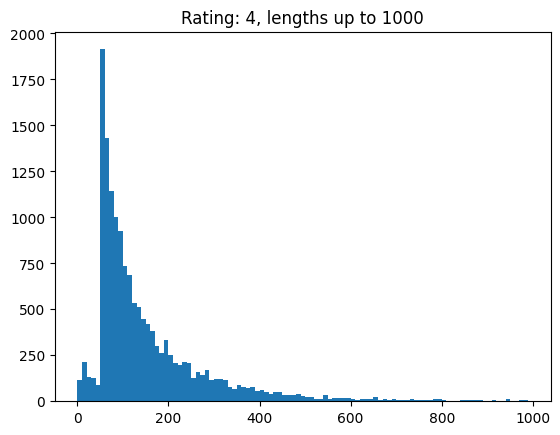

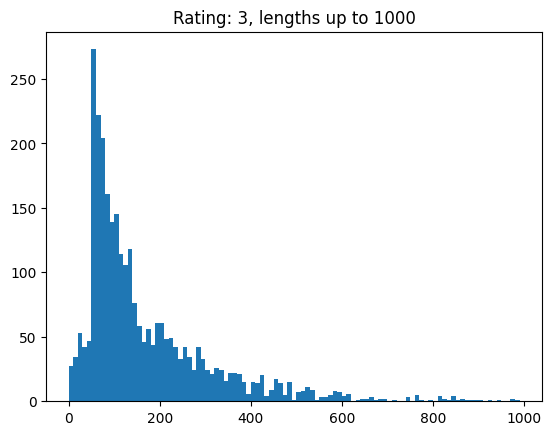

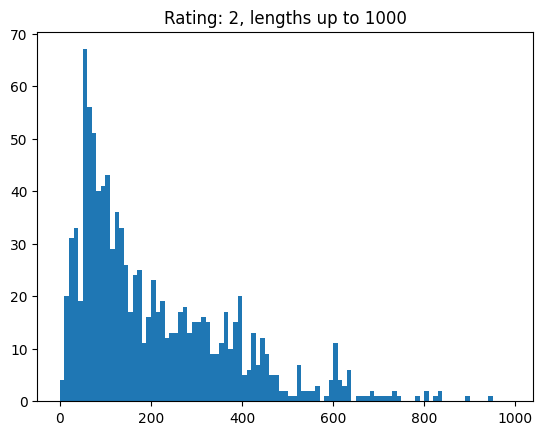

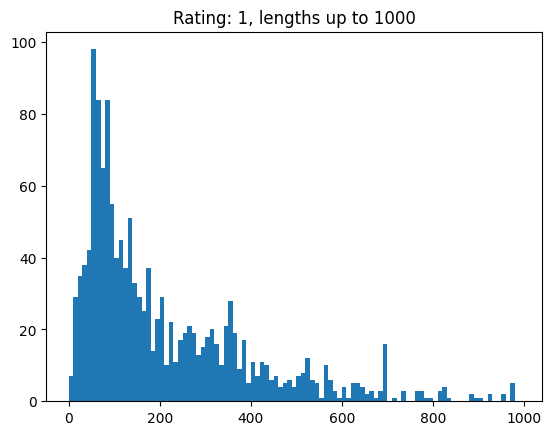

In [7]:
for rating in range(5,0,-1):
    lens = df[df['rating'] == rating]['text'].map(len).values
    plt.hist(lens, bins=range(0, 1000, 10))
    plt.title(f'Rating: {rating}, lengths up to 1000')
    plt.show()

## Short texts

In [8]:
df[df['text'].apply(lambda x: len(x) < 10)]

rating       text
55        5.0  Excellent
206       1.0   all dead
265       4.0         OK
276       5.0     GREAT!
328       5.0   All Good
...       ...        ...
36778     5.0    Awesome
36789     5.0   Perfect.
36803     5.0      Dandy
40056     5.0     #NAME?
61863     5.0  Read more

[862 rows x 2 columns]

In [9]:
value_counts = df[df['text'].apply(lambda x: len(x) < 10)].value_counts()
print(value_counts[5][:10])
print(value_counts[4][:10])
print(value_counts[3][:10])
print(value_counts[2][:10])
print(value_counts[1][:10])

text
good         49
great        46
Great        36
Good         31
Excellent    28
ok           19
Good deal    14
good deal    14
excellent    12
very good    12
dtype: int64
text
good         12
Good         11
ok           10
OK            9
great         4
Ok            4
good buy      3
Work good     2
Thanks        2
Ok.           2
dtype: int64
text
ok          4
Works       2
fine        2
love it     2
It is ok    1
1           1
Bargin.     1
GOOD USE    1
Goof        1
Goog        1
dtype: int64
text
Adequate     2
Dies fast    1
Too          1
dtype: int64
text
Booooo       1
Dangerous    1
Not good     1
all dead     1
garbage      1
terrible     1
Cheap        1
dtype: int64


## Duplicates

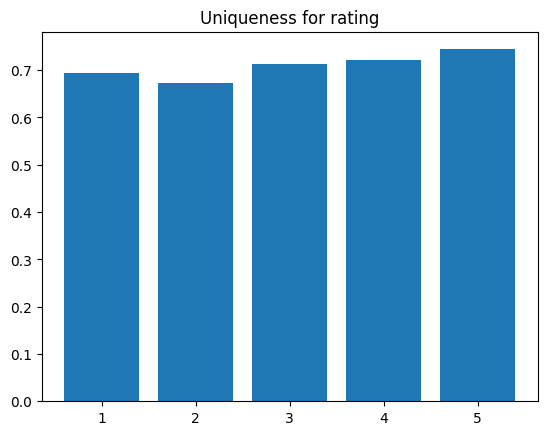

In [10]:
uniquenesses = []
for rating in range(5,0,-1):
    rating_df = df[df['rating'] == rating]
    uniquenesses.append(rating_df.drop_duplicates().shape[0]/rating_df.shape[0])

plt.bar([1,2,3,4,5], uniquenesses)
plt.title(f'Uniqueness for rating')
plt.show()


20953


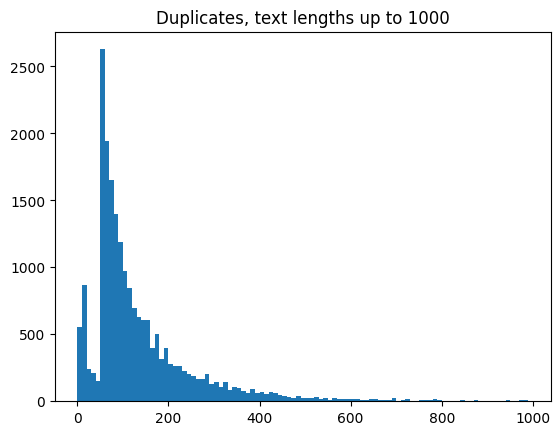

In [11]:
lens = df[df.duplicated()]['text'].map(len).values
plt.hist(lens, bins=range(0, 1000, 10))
plt.title('Duplicates, text lengths up to 1000')
print(df[df.duplicated()].shape[0])
plt.show()

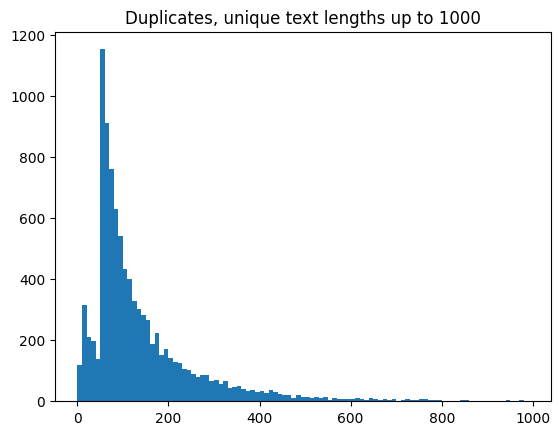

In [12]:
lens = df[df.duplicated()].drop_duplicates()['text'].map(len).values
plt.hist(lens, bins=range(0, 1000, 10))
plt.title('Duplicates, unique text lengths up to 1000')
plt.show()

# Prepared Dataset

In [13]:
prep_df = pd.read_pickle('data/data.pkl')
prep_df

review  rating
0     Wonderful inexpensive tablet, for the novice o...       1
1     awesome, great value, good quality product, I ...       1
2     Bought this as a gift for my mom and she loves...       1
3     Works great even in OK network areas. Long bat...       1
4     This is my second kindle. I think I overloaded...       1
...                                                 ...     ...
9904  Couldn‚Äôt use it for video chat with amazon s...       0
9905  It works great and fun great to use can't wait...       1
9906  Only lasts half as long as the Rayovacs i usua...       0
9907  I love this Kindle. I love the fact that you c...       1
9908  Good for kids ... brightness is not so good, ....       0

[9909 rows x 2 columns]

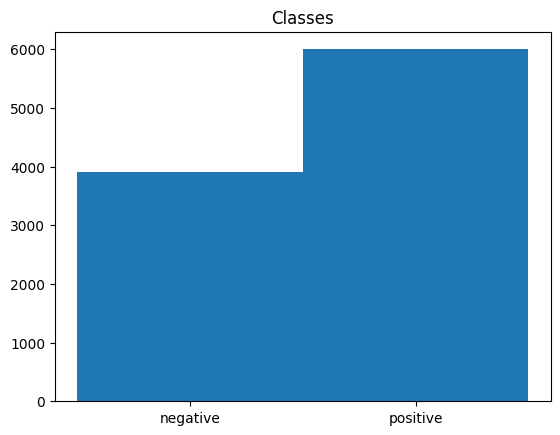

In [14]:
plt.hist(prep_df['rating'], range=(0,2), bins=[0,0.5,1])
plt.xticks([0.25,0.75], labels=['negative','positive'])
plt.title('Classes')
plt.show()

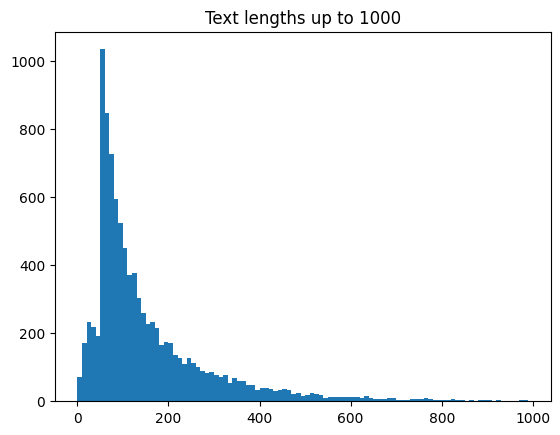

In [15]:
lens = prep_df['review'].map(len).values
plt.hist(lens, bins=range(0, 1000, 10))
plt.title('Text lengths up to 1000')
plt.show()